In [1]:
import scanpy as sc

In [2]:
from bbtnn.tnn_v3 import *

In [3]:
%%capture
adata = sc.read("/Users/lsimon/Dropbox/Platelet/BBTNN/Merge_filter.h5")
sc.pp.recipe_zheng17(adata, n_top_genes = 3000)
sc.pp.neighbors(adata, n_neighbors = 20, n_pcs = 50)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


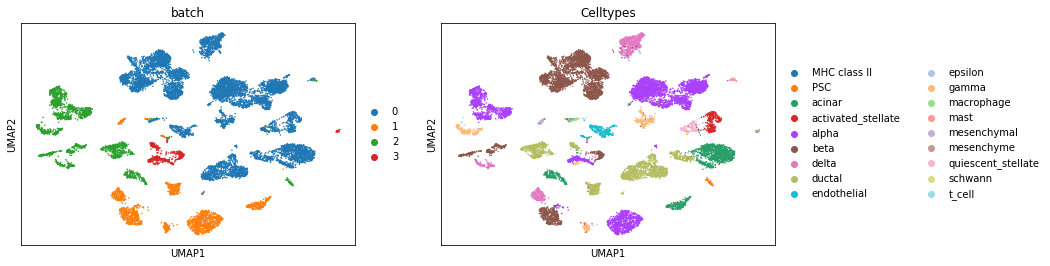

In [4]:
sc.pl.umap(adata, color = ["batch", "Celltypes"])

In [7]:
cells = []
for i in adata.obs["batch"].unique():
    tmp = np.random.choice(adata[np.where(adata.obs["batch"] == i)].obs_names, 400, replace = False)
    cells += list(tmp)

In [4]:
import numpy as np
weigths = [1] * adata.shape[0]
tmp = adata.obs["batch"].value_counts()
for i in range(0, adata.shape[0]):
    batch = adata.obs["batch"][i]
    weigths[i] = weigths[i] / tmp[batch]

x = weigths
weigths = (x-min(x))/(max(x)-min(x))

In [7]:
%%time
model = TNN(k = 50, batch_size = 32, k_to_m_ratio = 1, n_epochs_without_progress = 5,
            verbose = 2, save_on_disk = False, approx = True)
#model.fit(X = adata[cells], batch_name = "batch", Y = None)
model.fit(X = adata, batch_name = "batch", Y = None)
embedding = model.transform(X = adata)

Calculating MNNs...
Processing datasets (0, 1)
Processing datasets (0, 2)
Processing datasets (0, 3)
Processing datasets (1, 2)
Processing datasets (1, 3)
Processing datasets (2, 3)
5553 cells defined as MNNs
Calculating KNNs
5553 cells defined as KNNs
Re-format
Training neural network
Epoch 1/1000
348/348 - 12s - loss: 1.0575
Epoch 2/1000
348/348 - 9s - loss: 0.5364
Epoch 3/1000
348/348 - 10s - loss: 0.4539
Epoch 4/1000
348/348 - 10s - loss: 0.3988
Epoch 5/1000
348/348 - 10s - loss: 0.3632
Epoch 6/1000
348/348 - 10s - loss: 0.3361
Epoch 7/1000
348/348 - 10s - loss: 0.3256
Epoch 8/1000
348/348 - 9s - loss: 0.3162
Epoch 9/1000
348/348 - 10s - loss: 0.2813
Epoch 10/1000
348/348 - 10s - loss: 0.2811
Epoch 11/1000
348/348 - 10s - loss: 0.2756
Epoch 12/1000
348/348 - 10s - loss: 0.2656
Epoch 13/1000
348/348 - 9s - loss: 0.2614
Epoch 14/1000
348/348 - 10s - loss: 0.2661
Epoch 15/1000
348/348 - 10s - loss: 0.2462
Epoch 16/1000
348/348 - 9s - loss: 0.2469
Epoch 17/1000
348/348 - 10s - loss: 0.

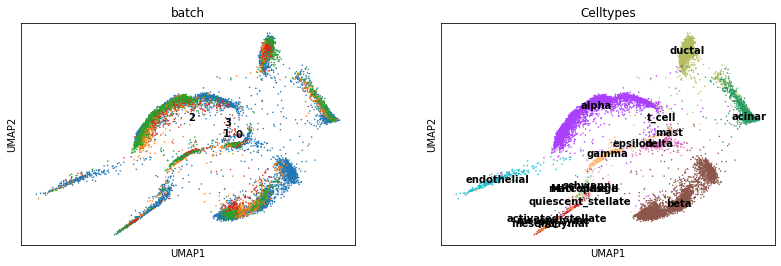

In [8]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = ["batch", "Celltypes"], legend_loc = "on data")

Add supervision to loss function

In [9]:
uniq = list(adata.obs["Celltypes"].unique())
y_labels = []
for i in adata.obs["Celltypes"]:
    y_labels.append(uniq.index(i))

In [10]:
%%time
model = TNN(k = 50, batch_size = 32, n_epochs_without_progress = 5, verbose = 2, save_on_disk = False)
model.fit(X = adata, batch_name = "batch", Y = y_labels)
embedding = model.transform(X = adata)

Calculating MNNs...
Processing datasets (0, 1)
Processing datasets (0, 2)
Processing datasets (0, 3)
Processing datasets (1, 2)
Processing datasets (1, 3)
Processing datasets (2, 3)
5553 cells defined as MNNs
Calculating KNNs
4165 cells defined as KNNs
Re-format
Training neural network
Epoch 1/1000
304/304 - 4s - loss: 0.9090
Epoch 2/1000
304/304 - 3s - loss: 0.5198
Epoch 3/1000
304/304 - 3s - loss: 0.4454
Epoch 4/1000
304/304 - 3s - loss: 0.3749
Epoch 5/1000
304/304 - 3s - loss: 0.3527
Epoch 6/1000
304/304 - 3s - loss: 0.3268
Epoch 7/1000
304/304 - 3s - loss: 0.3154
Epoch 8/1000
304/304 - 3s - loss: 0.3042
Epoch 9/1000
304/304 - 3s - loss: 0.2950
Epoch 10/1000
304/304 - 3s - loss: 0.2794
Epoch 11/1000
304/304 - 3s - loss: 0.2800
Epoch 12/1000
304/304 - 3s - loss: 0.2653
Epoch 13/1000
304/304 - 3s - loss: 0.2555
Epoch 14/1000
304/304 - 3s - loss: 0.2578
Epoch 15/1000
304/304 - 3s - loss: 0.2628
Epoch 16/1000
304/304 - 3s - loss: 0.2453
Epoch 17/1000
304/304 - 3s - loss: 0.2431
Epoch 18

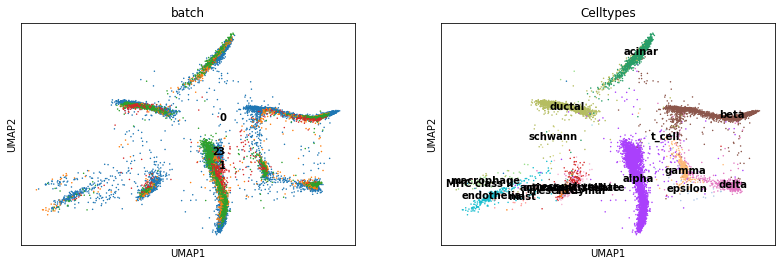

In [11]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = ["batch", "Celltypes"], legend_loc = "on data")

In [ ]:
mask = np.random.choice(range(len(Y_train)), size=len(Y_train) // 2, replace=False)
Y_train_masked = np.array(Y_train, dtype=np.int8) # Can't use uint to represent
Y_train_masked[mask] = -1